# Module 2 Analysis

_Isaiah Osborne_

In my analysis, I'm primarily looking at the effects of gender on earning potential in our dataset.


## Import Libraries 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

sns.set_theme()

### Load Dataset 

In [2]:
data = pd.read_csv("../../data/adult.csv")
data

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


## Gender Representation

Before we start looking at the effects on salary, we first need to look at the total number of men/women in the dataset.

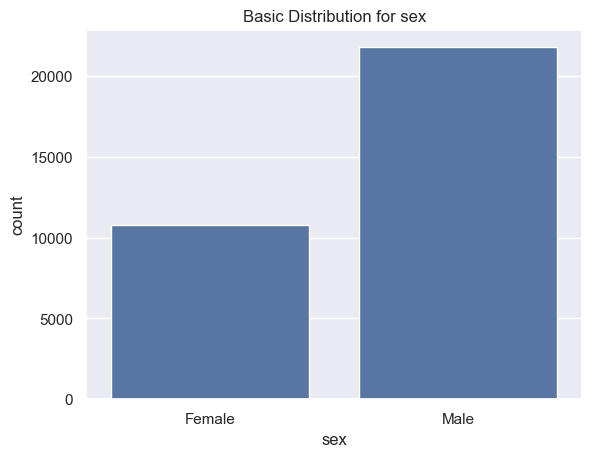

In [3]:
# https://stackoverflow.com/a/42409861
basicGenderChart = sns.countplot(data=data, x="sex")
basicGenderChart.set_title("Basic Distribution for sex")
plt.show()

Ok, so it looks like our dataset is biased toward men, with about twice as many men as women. At first glance, this sounds problematic, but let's check the actual distribution.

Since you can't tell if something is biased if you don't have a good idea of your "ideal" proportions, I found the original data here: <https://www.cdc.gov/nchs/data/statab/techap94.pdf>.

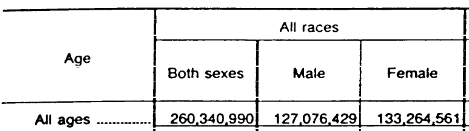

_(Page 60 of the report)_

In [4]:
print(f"Census proportion of men: {127076429/260340990:.2%}")

Census proportion of men: 48.81%


In [5]:
print(f"Sample proportion of men: {len(data[data["sex"] == "Male"]) / len(data):.2%}")

Sample proportion of men: 66.92%


This is substantially different... Let's check and see if it breaks across race lines any too.

In [6]:
print(data["race"].unique())

['White' 'Black' 'Asian-Pac-Islander' 'Other' 'Amer-Indian-Eskimo']


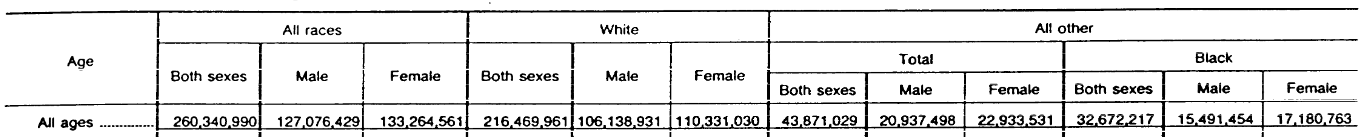

The Census data here is imperfect; it doesn't have all of the races that the dataset does... But we can look at the main effects for white, black, and other.

#### White Men

In [7]:
print(f"Census proportion of white men: {106138931/260340990:.2%}")

Census proportion of white men: 40.77%


In [8]:
print(
    f"Sample proportion of white men: {len(data[(data["sex"] == "Male") & (data["race"] == "White") ]) / len(data):.2%}"
)

Sample proportion of white men: 58.89%


It looks this dataset is pretty heavily biased toward white men...

#### Black Men

In [9]:
print(f"Census proportion of black men: {15491454/260340990:.2%}")

Census proportion of black men: 5.95%


In [10]:
print(
    f"Sample proportion of black men: {len(data[(data["sex"] == "Male") & (data["race"] == "Black") ]) / len(data):.2%}"
)

Sample proportion of black men: 4.82%


It looks like black men are slightly underrepresented here, but this is not nearly as significant as the overrepresentation of white men.

#### Other Races - Men

In [11]:
print(f"Census proportion of men from other races: {5446044/260340990:.2%}")

Census proportion of men from other races: 2.09%


In [12]:
print(
    f"Sample proportion of men from other races: {len(data[(data["sex"] == "Male") &
    ((data["race"] != "Black") & (data["race"] != "White"))])  / len(data):.2%}"
)

Sample proportion of men from other races: 3.22%


It looks like other races might be slightly overrepresented, but not as bad as the white men.

### Gender Bias Conclusion

Overall, it definitely appears that this dataset is biased on gender. In particular, white men are heavily overrepresented compared to the overall population. Whatever sampling method was used to create this dataset is very biased, whether intentionally or unintentionally. For fairer representation, more subjects should be added to at least balance the population proportions of minorities. In fact, with some of our population minority proportions being so small, we might want to oversample our minority classes to ensure the model fairly represents them.

## Effects on Salary from Gender

Let's see if a person's gender affects the likelihood of making more than $\$50k$. But first of all, we'll want to start with our basic distribution for making more than $\$50k$ - we have to be able to compare!

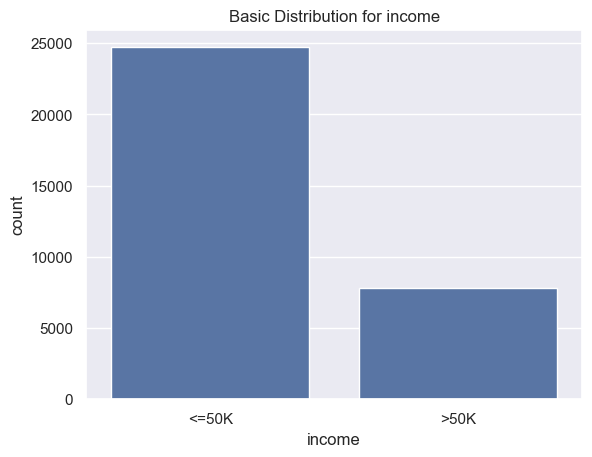

In [13]:
# https://stackoverflow.com/a/42409861
basicChart = sns.countplot(data=data, x="income")
basicChart.set_title("Basic Distribution for income")
plt.show()

Ok, if we see any variables that don't have a similar distribution to this, then we'll know something's wrong!

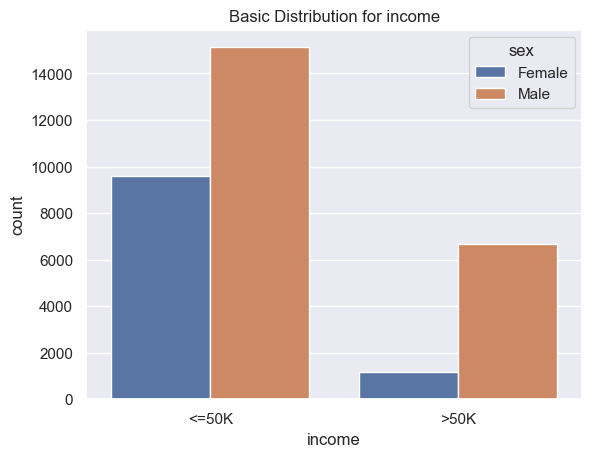

In [14]:
# https://stackoverflow.com/a/42409861
genderChart = sns.countplot(data=data, x="income", hue="sex")
genderChart.set_title("Basic Distribution for income")
plt.show()

Ok, this is already starting to look problematic. There are more men in both of the categories, which isn't necessarily problematic by itself (although it does raise questions of why women aren't working) but the ratios for these salaries are starting to look concerning. We can test this officially!

### Testing for Gender Bias

(As a stats major in undergrad, I'm just glad that I can finally use this!)

<https://online.stat.psu.edu/stat415/lesson/9/9.4>

We can formally test if men and women have different proportions by using this test statistic:

$Z=\dfrac{(\hat{p}_{\text{men}}-\hat{p}_{\text{women}})-0}{\sqrt{\hat{p}_{\text{overall}}(1-\hat{p}_{\text{overall}})\left(\dfrac{1}{n_1}+\dfrac{1}{n_2}\right)}}$,



#### $\hat{p}_\text{overall}$

In [15]:
# get the total number of people
peopleCount = data["income"].count()
print("Get the total number of people: ", peopleCount)

# Get the total number of people in each category
print("Get the total number of people in each category:")
salaryCounts = data["income"].value_counts()
print(salaryCounts)

# Get the total number of people making more than 50K
peopleOver50K = salaryCounts[">50K"]
print("Get the total number of people making more than 50k: ", peopleOver50K)

# Get the overall proportion
salaryProportion = peopleOver50K / peopleCount
print(f"Overall proportion making over >50k: {salaryProportion:.2%}")

Get the total number of people:  32561
Get the total number of people in each category:
income
<=50K    24720
>50K      7841
Name: count, dtype: int64
Get the total number of people making more than 50k:  7841
Overall proportion making over >50k: 24.08%


#### $\hat{p}_\text{men}$

In [16]:
menData = data[data["sex"] == "Male"]

# get the total number of people
menCount = menData["income"].count()
print("Get the total number of people: ", menCount)

# Get the total number of people in each category
print("Get the total number of people in each category:")
menSalaryCounts = menData["income"].value_counts()
print(menSalaryCounts)

# Get the total number of people making more than 50K
menOver50K = menSalaryCounts[">50K"]
print("Get the total number of people making more than 50k: ", menOver50K)

# Get the overall proportion
menSalaryProportion = menOver50K / menCount
print(f"Overall proportion of men making over >50k: {menSalaryProportion:.2%}")

Get the total number of people:  21790
Get the total number of people in each category:
income
<=50K    15128
>50K      6662
Name: count, dtype: int64
Get the total number of people making more than 50k:  6662
Overall proportion of men making over >50k: 30.57%


#### $\hat{p}_\text{women}$

In [17]:
womenData = data[data["sex"] == "Female"]

# get the total number of people
womenCount = womenData["income"].count()
print("Get the total number of people: ", womenCount)

# Get the total number of people in each category
print("Get the total number of people in each category:")
womenSalaryCounts = womenData["income"].value_counts()
print(womenSalaryCounts)

# Get the total number of people making more than 50K
womenOver50K = womenSalaryCounts[">50K"]
print("Get the total number of people making more than 50k: ", womenOver50K)

# Get the overall proportion
womenSalaryProportion = womenOver50K / womenCount
print(f"Overall proportion of women making over >50k: {womenSalaryProportion:.2%}")

Get the total number of people:  10771
Get the total number of people in each category:
income
<=50K    9592
>50K     1179
Name: count, dtype: int64
Get the total number of people making more than 50k:  1179
Overall proportion of women making over >50k: 10.95%


Umm, this doesn't look great... Let's formally test it.

In [18]:
Z = (menSalaryProportion - womenSalaryProportion) / math.sqrt(
    salaryProportion * (1 - salaryProportion) * (1 / menCount + 1 / womenCount)
)
Z

38.972898531634414

I don't even need to calculate a formal probability for this... men and women do not get high salaries at the same rate.

### But why?

Maybe there's a different confounding variable here - maybe men and women have different rates of education, which affects earnings? Let's dig into this and see what other variables might be confounding us.

In [20]:
# https://stackoverflow.com/a/21711869
# I know performance probably isn't stellar, but there's so few rows it should probably be ok...
def categorizeIncome(row):
    return row["income"] == ">50K"


# this gives us 1 if it's high income; 0 otherwise
data["incomeCategory"] = data.apply(categorizeIncome, axis=1).astype(int)

In [23]:
data

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,incomeCategory
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K,0
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K,0
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K,0
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,0
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,1
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,0


#### Effects of Education on Earnings by Gender

In [21]:
educationGender = data.groupby(["education", "sex"])["incomeCategory"].mean()
educationGender = educationGender.reset_index()
educationGender

,education,sex,incomeCategory
0,10th,Female,0.010169
1,10th,Male,0.092476
2,11th,Female,0.018519
3,11th,Male,0.069987
4,12th,Female,0.027778
5,12th,Male,0.100346
6,1st-4th,Female,0.000000
7,1st-4th,Male,0.049180
8,5th-6th,Female,0.023810
9,5th-6th,Male,0.056225


This gives us the percentage of people in each category making more than $\$50K$. Let's visualize this...

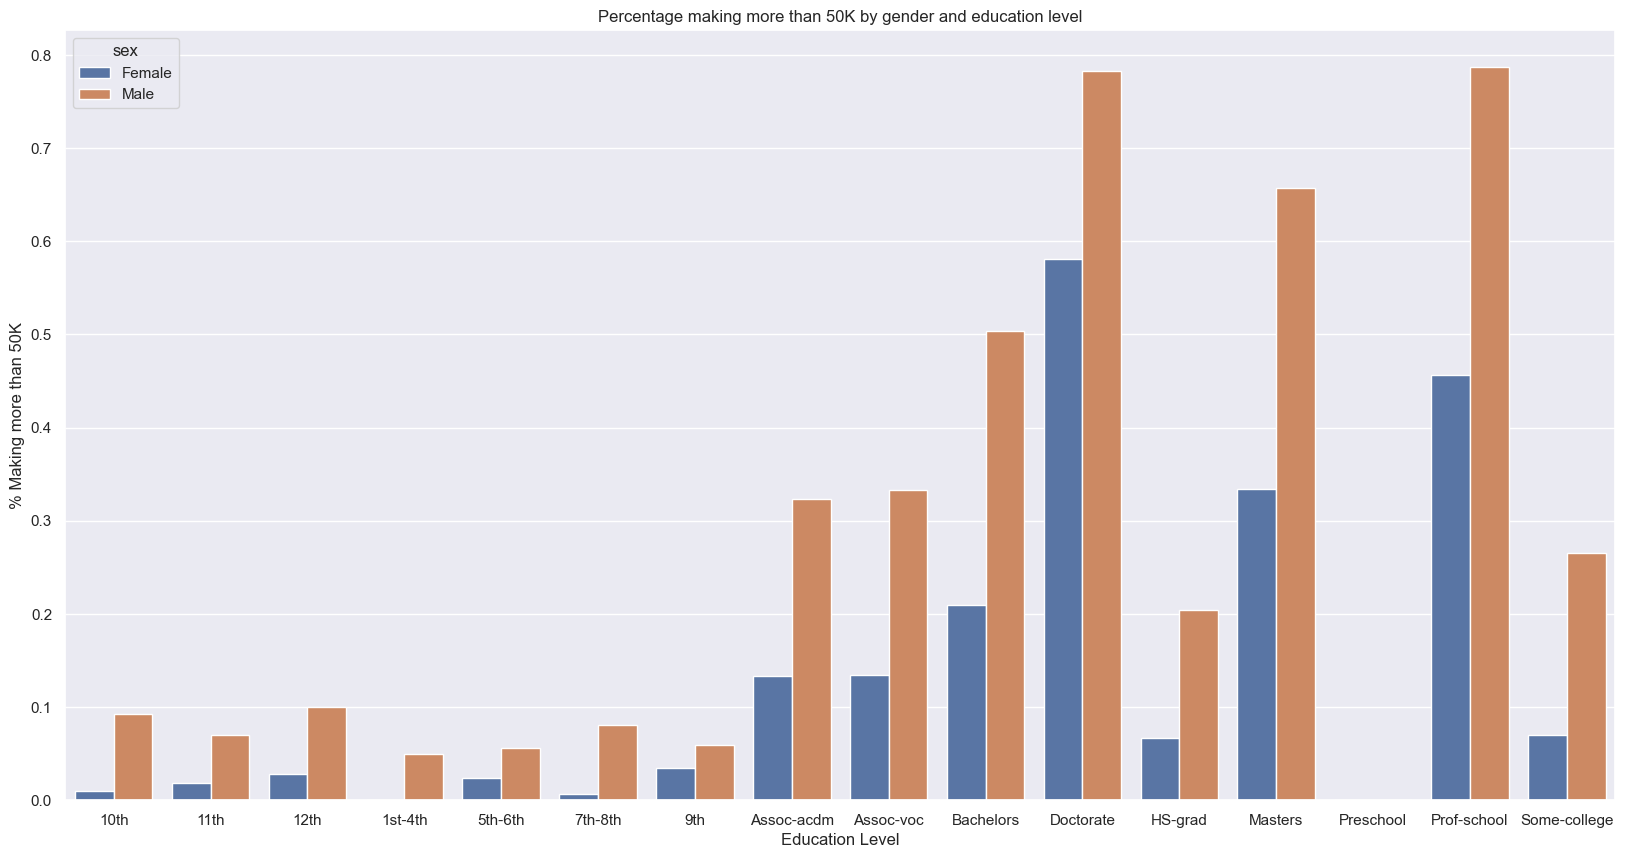

In [22]:
plt.figure(figsize=(20, 10))
educationGenderChart = sns.barplot(
    educationGender, y="incomeCategory", x="education", hue="sex"
)
educationGenderChart.set_title(
    "Percentage making more than 50K by gender and education level"
)
educationGenderChart.set_xlabel("Education Level")
educationGenderChart.set_ylabel("% Making more than 50K")
plt.show()

From this graph, it generally looks like there are more education increases salary, as expected. However, there's no category where women actually have a higher salary than men... Let's limit this to only full time workers and see if that causes any improvements.

In [ ]:
educationGender = (
    data[data["hours.per.week"] == 40]
    .groupby(["education", "sex"])["incomeCategory"]
    .mean()
)
educationGender = educationGender.reset_index()
educationGender

,education,sex,incomeCategory
0,10th,Female,0.000000
1,10th,Male,0.098462
2,11th,Female,0.020833
3,11th,Male,0.076923
4,12th,Female,0.070175
5,12th,Male,0.123288
6,1st-4th,Female,0.000000
7,1st-4th,Male,0.050000
8,5th-6th,Female,0.040816
9,5th-6th,Male,0.052288


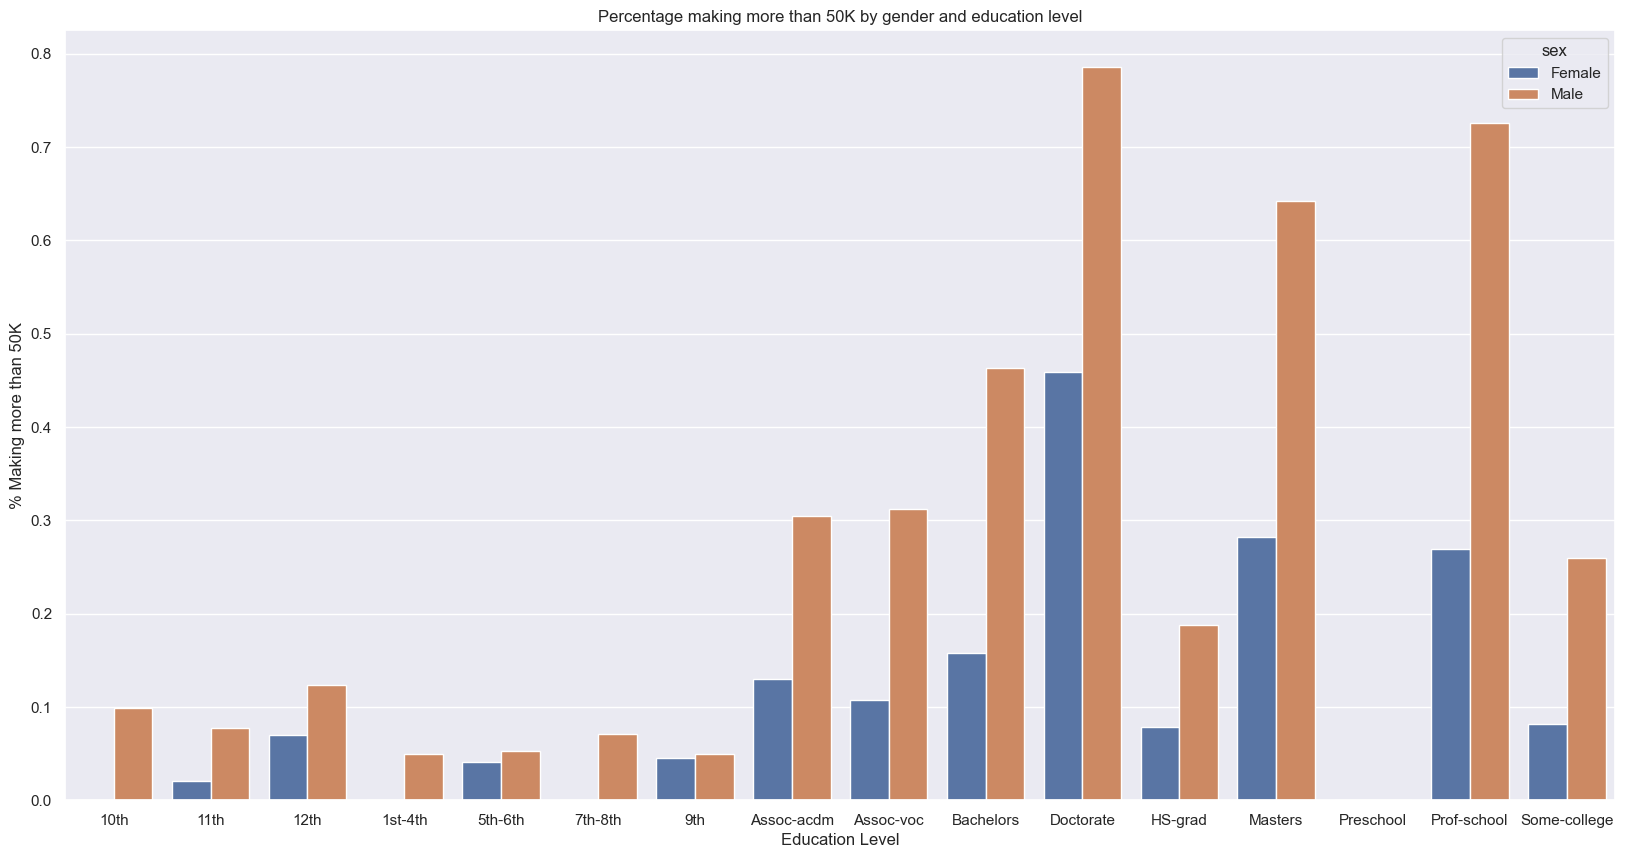

In [26]:
plt.figure(figsize=(20, 10))
educationGenderChart = sns.barplot(
    educationGender, y="incomeCategory", x="education", hue="sex"
)
educationGenderChart.set_title(
    "Percentage making more than 50K by gender and education level"
)
educationGenderChart.set_xlabel("Education Level")
educationGenderChart.set_ylabel("% Making more than 50K")
plt.show()

Honestly, full-time work doesn't seem like it effects our earnings at all - there's still a major disparity between men and women.

### Effects of Race on Earnings by Gender

Is race confounding our results here? (And if it is, then it's honestly going to point bigger biases)

In [29]:
educationRace = data.groupby(["race", "sex"])["incomeCategory"].mean()
educationRace = educationRace.reset_index()
educationRace

,race,sex,incomeCategory
0,Amer-Indian-Eskimo,Female,0.100840
1,Amer-Indian-Eskimo,Male,0.125000
2,Asian-Pac-Islander,Female,0.124277
3,Asian-Pac-Islander,Male,0.336219
4,Black,Female,0.057878
5,Black,Male,0.189293
6,Other,Female,0.055046
7,Other,Male,0.117284
8,White,Female,0.118954
9,White,Male,0.317565


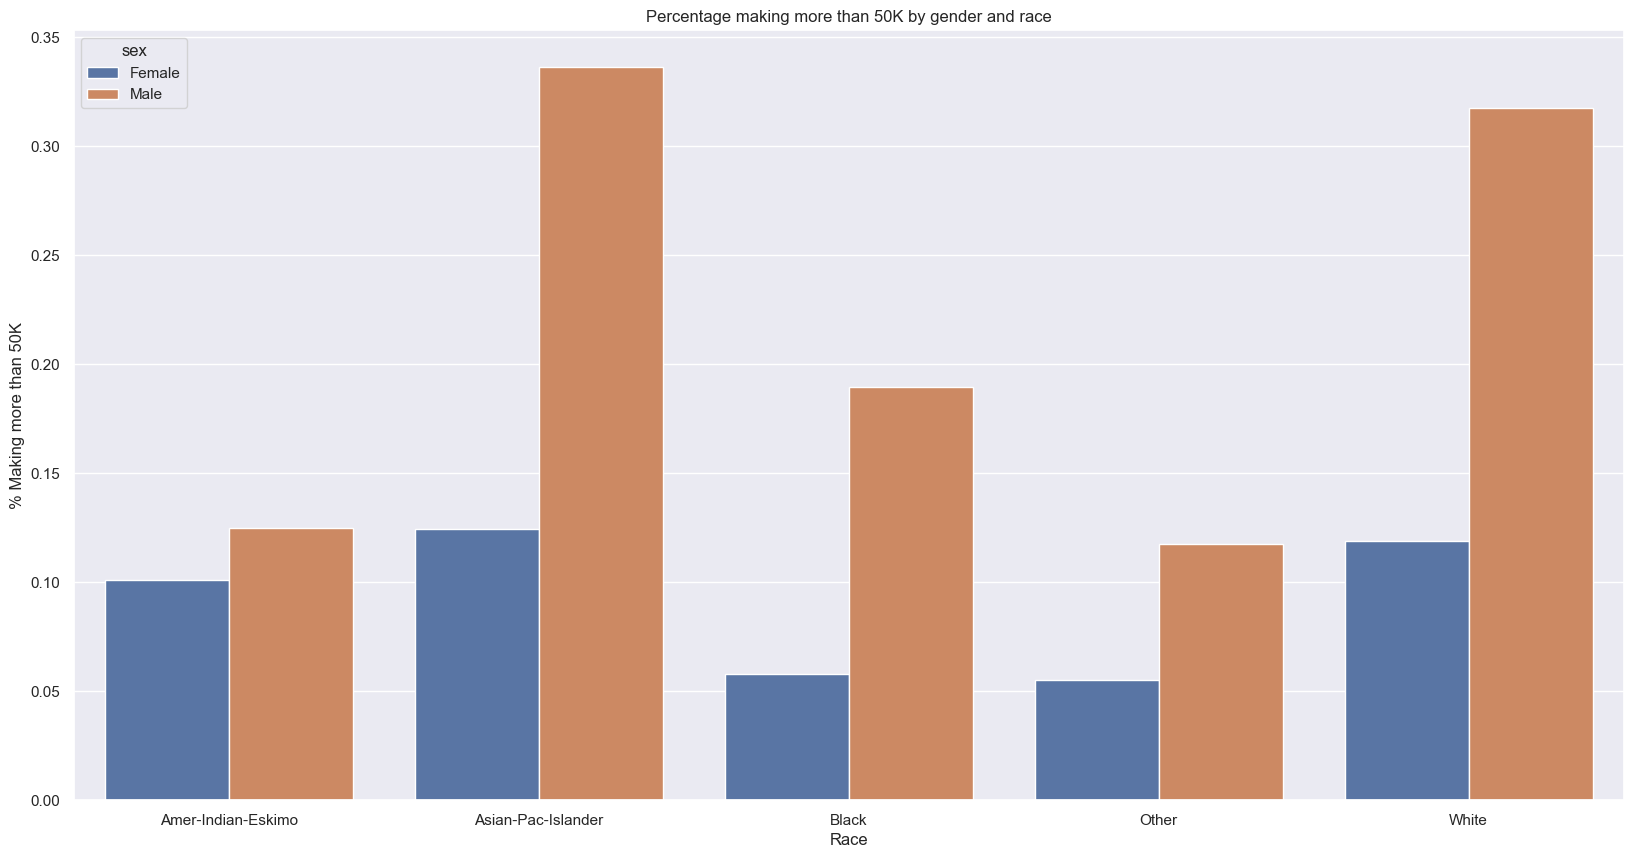

In [ ]:
plt.figure(figsize=(20, 10))
educationRaceChart = sns.barplot(educationRace, y="incomeCategory", x="race", hue="sex")
educationRaceChart.set_title("Percentage making more than 50K by gender and race")
educationRaceChart.set_xlabel("Race")
educationRaceChart.set_ylabel("% Making more than 50K")
plt.show()

It's still not especially great - men handily out earn women.

While this wasn't explicitly the focus of this analysis, it also looks like there is substantial bias across races - white women earn more than men from `Amer-Indian-Eskimo` and `Other` and women from practically every other group.